<a href="https://colab.research.google.com/github/kyv1r/DZpoML1/blob/main/lab2/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [ ]:
!pip install pandas
!pip install seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [ ]:
df = pd.read_csv("/content/ca_offenses_by_agency.csv")
df

,State/Tribal/Other,Agency,Unit/Office,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,State Agencies,Atascadero State Hospital4,NaN,321.0,0.0,0.0,NaN,0.0,321.0,4,0.0,2,2,0.0
1,State Agencies,California State Fair4,NaN,12.0,0.0,0.0,NaN,0.0,12.0,79,21.0,56,2,1.0
2,State Agencies,Coalinga State Hospital,NaN,149.0,0.0,0.0,NaN,0.0,149.0,3,1.0,2,0,0.0
3,State Agencies,Department of Parks and Recreation,Angeles,2.0,0.0,0.0,NaN,1.0,1.0,26,8.0,18,0,0.0
4,State Agencies,Department of Parks and Recreation,Bay Area,0.0,0.0,0.0,NaN,0.0,0.0,1,0.0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   State/Tribal/Other                    169 non-null    object 
 1   Agency                                169 non-null    object 
 2   Unit/Office                           143 non-null    object 
 3   Violent crime                         169 non-null    float64
 4   Murder and nonnegligent manslaughter  169 non-null    float64
 5   Rape (revised definition)             169 non-null    float64
 6   Rape (legacy definition)              0 non-null      float64
 7   Robbery                               169 non-null    float64
 8   Aggravated assault                    169 non-null    float64
 9   Property crime                        169 non-null    object 
 10  Burglary                              169 non-null    float64
 11  Larceny-theft      

In [ ]:
df["Murder and nonnegligent manslaughter"] = df["Murder and nonnegligent manslaughter"].astype("category")
df["Burglary"] = df["Burglary"].astype("float64")
df["Rape (revised definition)"] = df["Rape (revised definition)"].astype("float64")
df["Robbery"] = df["Robbery"].astype("float64")
#Вывести типы колонок тут
print(df.dtypes)

State/Tribal/Other                        object
Agency                                    object
Unit/Office                               object
Violent crime                            float64
Murder and nonnegligent manslaughter    category
Rape (revised definition)                float64
Rape (legacy definition)                 float64
Robbery                                  float64
Aggravated assault                       float64
Property crime                            object
Burglary                                 float64
Larceny-theft                             object
Motor vehicle theft                       object
Arson                                    float64
dtype: object


In [ ]:
Y = df["Murder and nonnegligent manslaughter"]
X = df["Violent crime"]

In [ ]:
describe = Y.describe()
describe

count     169.0
unique      4.0
top         0.0
freq      165.0
Name: Murder and nonnegligent manslaughter, dtype: float64

In [ ]:
mean = df.groupby(["Murder and nonnegligent manslaughter"])["Violent crime"].mean()
mean

Murder and nonnegligent manslaughter
0.0     10.09697
1.0    111.00000
2.0      9.00000
3.0    803.00000
Name: Violent crime, dtype: float64

In [ ]:
median = df.groupby(["Murder and nonnegligent manslaughter"])["Violent crime"].median()
median

Murder and nonnegligent manslaughter
0.0      0.0
1.0    111.0
2.0      9.0
3.0    803.0
Name: Violent crime, dtype: float64

In [ ]:
mode = df.groupby(["Murder and nonnegligent manslaughter"])["Violent crime"].agg(pd.Series.mode)
mode

Murder and nonnegligent manslaughter
0.0              0.0
1.0    [87.0, 135.0]
2.0              9.0
3.0            803.0
Name: Violent crime, dtype: object

In [ ]:
min = df.groupby(["Murder and nonnegligent manslaughter"])["Violent crime"].min()
min

Murder and nonnegligent manslaughter
0.0      0.0
1.0     87.0
2.0      9.0
3.0    803.0
Name: Violent crime, dtype: float64

In [ ]:
max = df.groupby(["Murder and nonnegligent manslaughter"])["Violent crime"].max()
max

Murder and nonnegligent manslaughter
0.0    566.0
1.0    135.0
2.0      9.0
3.0    803.0
Name: Violent crime, dtype: float64

In [ ]:
std = df.groupby(["Murder and nonnegligent manslaughter"])["Violent crime"].std()
std

Murder and nonnegligent manslaughter
0.0    52.952835
1.0    33.941125
2.0          NaN
3.0          NaN
Name: Violent crime, dtype: float64

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [ ]:
q1 = df.groupby(['Murder and nonnegligent manslaughter'])['Violent crime'].quantile(0.25)
q1

Murder and nonnegligent manslaughter
0.0      0.0
1.0     99.0
2.0      9.0
3.0    803.0
Name: Violent crime, dtype: float64

In [ ]:
q2 = df.groupby(['Murder and nonnegligent manslaughter'])['Violent crime'].quantile(0.5)
q1

Murder and nonnegligent manslaughter
0.0      0.0
1.0     99.0
2.0      9.0
3.0    803.0
Name: Violent crime, dtype: float64

In [ ]:
q3 = df.groupby(['Murder and nonnegligent manslaughter'])['Violent crime'].quantile(0.75)
q1

Murder and nonnegligent manslaughter
0.0      0.0
1.0     99.0
2.0      9.0
3.0    803.0
Name: Violent crime, dtype: float64

In [ ]:
iqr = q3-q1
iqr

Murder and nonnegligent manslaughter
0.0     2.0
1.0    24.0
2.0     0.0
3.0     0.0
Name: Violent crime, dtype: float64

Какие выводы можно сделать исходя из полученных статистических данных?

**Ответ здесь**

```
Наблюдается сильная вариативность числа насильственных преступлений в зависимости от уровня убийств. Величина интерквартильного размаха для числа насильственных преступлений также разнится среди разных уровней убийств. Это указывает на различия в распределении данных для разных категорий уровней убийств.
Уровень убийств может оказывать влияние на количество насильственных преступлений, и необходимо более подробно исследовать факторы, которые могут влиять на эту связь.
```


##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

<Axes: xlabel='Murder and nonnegligent manslaughter', ylabel='count'>

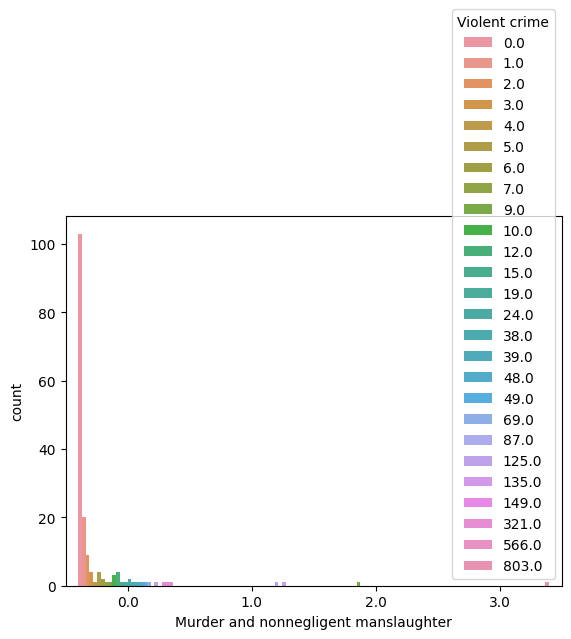

In [ ]:
import matplotlib.pyplot as plt
sns.countplot(x='Murder and nonnegligent manslaughter', hue='Violent crime', data=df)

Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

<Axes: >

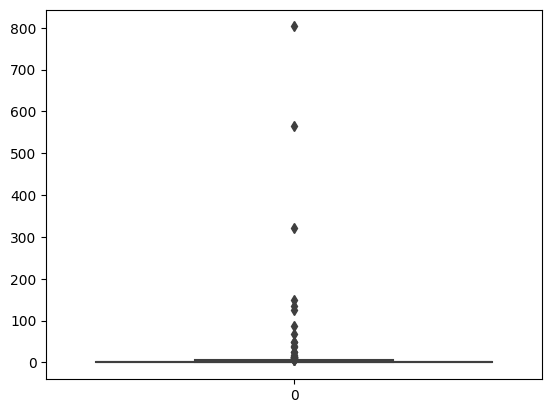

In [ ]:
sns.boxplot(X)

<Axes: xlabel='Murder and nonnegligent manslaughter', ylabel='Violent crime'>

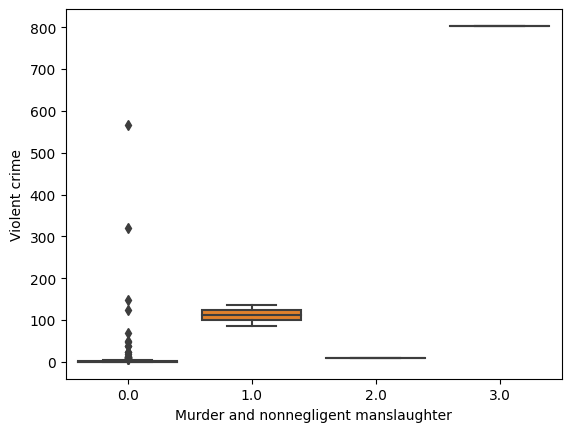

In [ ]:
sns.boxplot(x="Murder and nonnegligent manslaughter",y='Violent crime',data=df)

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

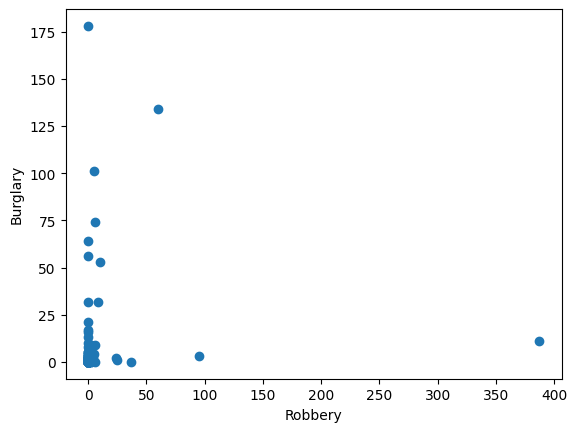

In [ ]:
plt.scatter(x=df["Robbery"],y=df["Burglary"])
plt.xlabel("Robbery")
plt.ylabel("Burglary")
plt.show()

Постройте матрицу корреляции для двух числовых признаков вашего датасета.

<ipython-input-24-1e247ef420af>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

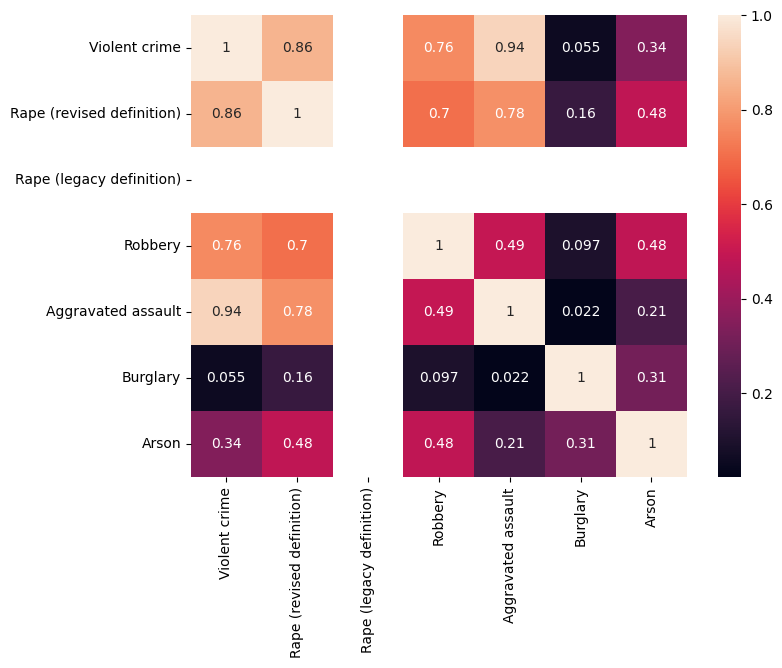

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисление корреляционной матрицы
corr_matrix = df.corr()

# Визуализация корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)

<Axes: >

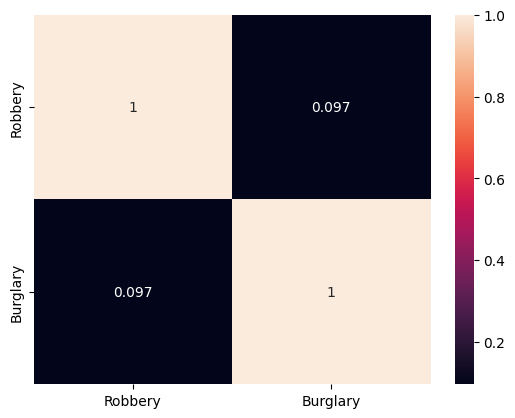

In [ ]:
grouped_data = df[["Robbery","Burglary"]]

corr_matrix = grouped_data.corr()

sns.heatmap(corr_matrix, annot=True)

Какие выводы можно сделать на основе графиков и матрицы корреляции?

**Ответ здесь**

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

### Пример реализации одного метода

In [ ]:
import math
from statistics import median, mean
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.ensemble import IsolationForest

class Outline:
    def __init__(self, df):
        self.df = df

    def find_outliers_mean_std(self, column_name):
        mean_data = mean(self.df[column_name])
        std_dev = stdev(self.df[column_name])
        maximum = mean_data + 2 * std_dev
        minimum = mean_data - 2 * std_dev
        self.df = self.df[(self.df[column_name] >= minimum) & (self.df[column_name] <= maximum)]
        return self.df

    def find_outliers_iqr(self, column_name):
        median_value = median(self.df[column_name])
        Q1 = self.df[column_name].quantile(0.25)
        Q3 = self.df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Найдите аномальные значения
        outliers = self.df[~((self.df[column_name] >= lower_bound) & (self.df[column_name] <= upper_bound))]

        # Запишите аномальные значения обратно в self.df
        self.df = self.df[(self.df[column_name] >= lower_bound) & (self.df[column_name] <= upper_bound)]

        return self.df, outliers

    def find_outliers_two_variables(self, col1, col2, eps, min_samples):
        iso_forest = IsolationForest(n_estimators=10)
        iso_forest.fit(self.df)
        return self.df[iso_forest.predict(self.df)!=-1]

# **На основе среднего и отклонения**

In [ ]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)

so.find_outliers_mean_std("col1")


,col1,col2
0,1,1
1,2,2
2,3,3
3,4,2
4,5,1


# **С помощью квартилей**

In [ ]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)

so.find_outliers_iqr("col1")

(   col1  col2
 0     1     1
 1     2     2
 2     3     3
 3     4     2
 4     5     1,
    col1  col2
 5  1000     4)

In [ ]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)

so.find_outliers_two_variables('col1', 'col2')

AttributeError: ignored